<a href="https://colab.research.google.com/github/kevyngustavo/portifolio/blob/best-books-ever-dataset-analysis/best_books_ever_dataset_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import and config

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
pooriamst_best_books_ever_dataset_path = kagglehub.dataset_download('pooriamst/best-books-ever-dataset')

print('Data source import complete.')


100%|██████████| 28.6M/28.6M [00:01<00:00, 29.1MB/s]

Extracting files...


Data source import complete.


In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk(pooriamst_best_books_ever_dataset_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        file_path = os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/root/.cache/kagglehub/datasets/pooriamst/best-books-ever-dataset/versions/1/books_1.Best_Books_Ever.csv


In [31]:
# Librares to visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Work data

## General Analysis

In [22]:
# load dataframe and show columns
df = pd.read_csv(file_path)
df.columns

Index(['bookId', 'title', 'series', 'author', 'rating', 'description',
       'language', 'isbn', 'genres', 'characters', 'bookFormat', 'edition',
       'pages', 'publisher', 'publishDate', 'firstPublishDate', 'awards',
       'numRatings', 'ratingsByStars', 'likedPercent', 'setting', 'coverImg',
       'bbeScore', 'bbeVotes', 'price'],
      dtype='object')

In [8]:
# Show head
df.head()

,bookId,title,series,author,rating,description,language,isbn,genres,characters,...,firstPublishDate,awards,numRatings,ratingsByStars,likedPercent,setting,coverImg,bbeScore,bbeVotes,price
0,2767052-the-hunger-games,The Hunger Games,The Hunger Games #1,Suzanne Collins,4.33,WINNING MEANS FAME AND FORTUNE.LOSING MEANS CE...,English,9780439023481,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas...","['Katniss Everdeen', 'Peeta Mellark', 'Cato (H...",...,NaN,['Locus Award Nominee for Best Young Adult Boo...,6376780,"['3444695', '1921313', '745221', '171994', '93...",96.0,"['District 12, Panem', 'Capitol, Panem', 'Pane...",https://i.gr-assets.com/images/S/compressed.ph...,2993816,30516,5.09
1,2.Harry_Potter_and_the_Order_of_the_Phoenix,Harry Potter and the Order of the Phoenix,Harry Potter #5,"J.K. Rowling, Mary GrandPré (Illustrator)",4.50,There is a door at the end of a silent corrido...,English,9780439358071,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',...","['Sirius Black', 'Draco Malfoy', 'Ron Weasley'...",...,06/21/03,['Bram Stoker Award for Works for Young Reader...,2507623,"['1593642', '637516', '222366', '39573', '14526']",98.0,['Hogwarts School of Witchcraft and Wizardry (...,https://i.gr-assets.com/images/S/compressed.ph...,2632233,26923,7.38
2,2657.To_Kill_a_Mockingbird,To Kill a Mockingbird,To Kill a Mockingbird,Harper Lee,4.28,The unforgettable novel of a childhood in a sl...,English,9999999999999,"['Classics', 'Fiction', 'Historical Fiction', ...","['Scout Finch', 'Atticus Finch', 'Jem Finch', ...",...,07/11/60,"['Pulitzer Prize for Fiction (1961)', 'Audie A...",4501075,"['2363896', '1333153', '573280', '149952', '80...",95.0,"['Maycomb, Alabama (United States)']",https://i.gr-assets.com/images/S/compressed.ph...,2269402,23328,NaN
3,1885.Pride_and_Prejudice,Pride and Prejudice,NaN,"Jane Austen, Anna Quindlen (Introduction)",4.26,Alternate cover edition of ISBN 9780679783268S...,English,9999999999999,"['Classics', 'Fiction', 'Romance', 'Historical...","['Mr. Bennet', 'Mrs. Bennet', 'Jane Bennet', '...",...,01/28/13,[],2998241,"['1617567', '816659', '373311', '113934', '767...",94.0,"['United Kingdom', 'Derbyshire, England (Unite...",https://i.gr-assets.com/images/S/compressed.ph...,1983116,20452,NaN
4,41865.Twilight,Twilight,The Twilight Saga #1,Stephenie Meyer,3.60,About three things I was absolutely positive.\...,English,9780316015844,"['Young Adult', 'Fantasy', 'Romance', 'Vampire...","['Edward Cullen', 'Jacob Black', 'Laurent', 'R...",...,10/05/05,"['Georgia Peach Book Award (2007)', 'Buxtehude...",4964519,"['1751460', '1113682', '1008686', '542017', '5...",78.0,"['Forks, Washington (United States)', 'Phoenix...",https://i.gr-assets.com/images/S/compressed.ph...,1459448,14874,2.1


In [10]:
# Account data null on dataframe
df.isnull().sum()

,0
bookId,0
title,0
series,29008
author,0
rating,0
description,1338
language,3806
isbn,0
genres,0
characters,0


In [13]:
df.dtypes

,0
bookId,object
title,object
series,object
author,object
rating,float64
description,object
language,object
isbn,object
genres,object
characters,object


In [14]:
# DF describe
df.describe()

,rating,numRatings,likedPercent,bbeScore,bbeVotes
count,52478.000000,5.247800e+04,51856.000000,5.247800e+04,52478.000000
mean,4.021878,1.787865e+04,92.231545,1.984023e+03,22.529003
std,0.367146,1.039448e+05,5.990689,3.515314e+04,369.158541
min,0.000000,0.000000e+00,0.000000,0.000000e+00,-4.000000
25%,3.820000,3.410000e+02,90.000000,8.400000e+01,1.000000
50%,4.030000,2.307000e+03,94.000000,9.700000e+01,1.000000
75%,4.230000,9.380500e+03,96.000000,1.870000e+02,2.000000
max,5.000000,7.048471e+06,100.000000,2.993816e+06,30516.000000


## Relationship between language and percentage of likes

Está seção busca trabalhar com a relação entre linguagem e percentual de likes

In [21]:
# Analisando colunas de linguagem
df["language"].value_counts()

,count
language,
English,42661
Arabic,1038
Spanish,687
French,579
German,528
...,...
Aromanian; Arumanian; Macedo-Romanian,1
Basque,1
Faroese,1


In [25]:
# Analisando colunas de percentual de likes
df["likedPercent"]

,likedPercent
0,96.0
1,98.0
2,95.0
3,94.0
4,78.0
...,...
52473,94.0
52474,95.0
52475,84.0
52476,90.0


In [86]:
# Agrupa apenas 25 linguagens com maior quantidade de livros
df_language_and_liked_percent = df.groupby("language")["likedPercent"].agg(["mean", "count"]).sort_values(by="count", ascending=False).head(25)
df_language_and_liked_percent.reset_index(inplace=True)
df_language_and_liked_percent.sort_values(by="mean", ascending=False)

,language,mean,count
12,"Greek, Modern (1453-)",96.000000,112
14,Japanese,95.329787,94
19,Bulgarian,94.308824,68
18,Malay,94.094595,74
17,Bengali,93.650602,83
13,Russian,93.387755,98
9,Turkish,93.344498,209
6,Portuguese,92.832869,359
24,Czech,92.653846,52
0,English,92.333223,42296


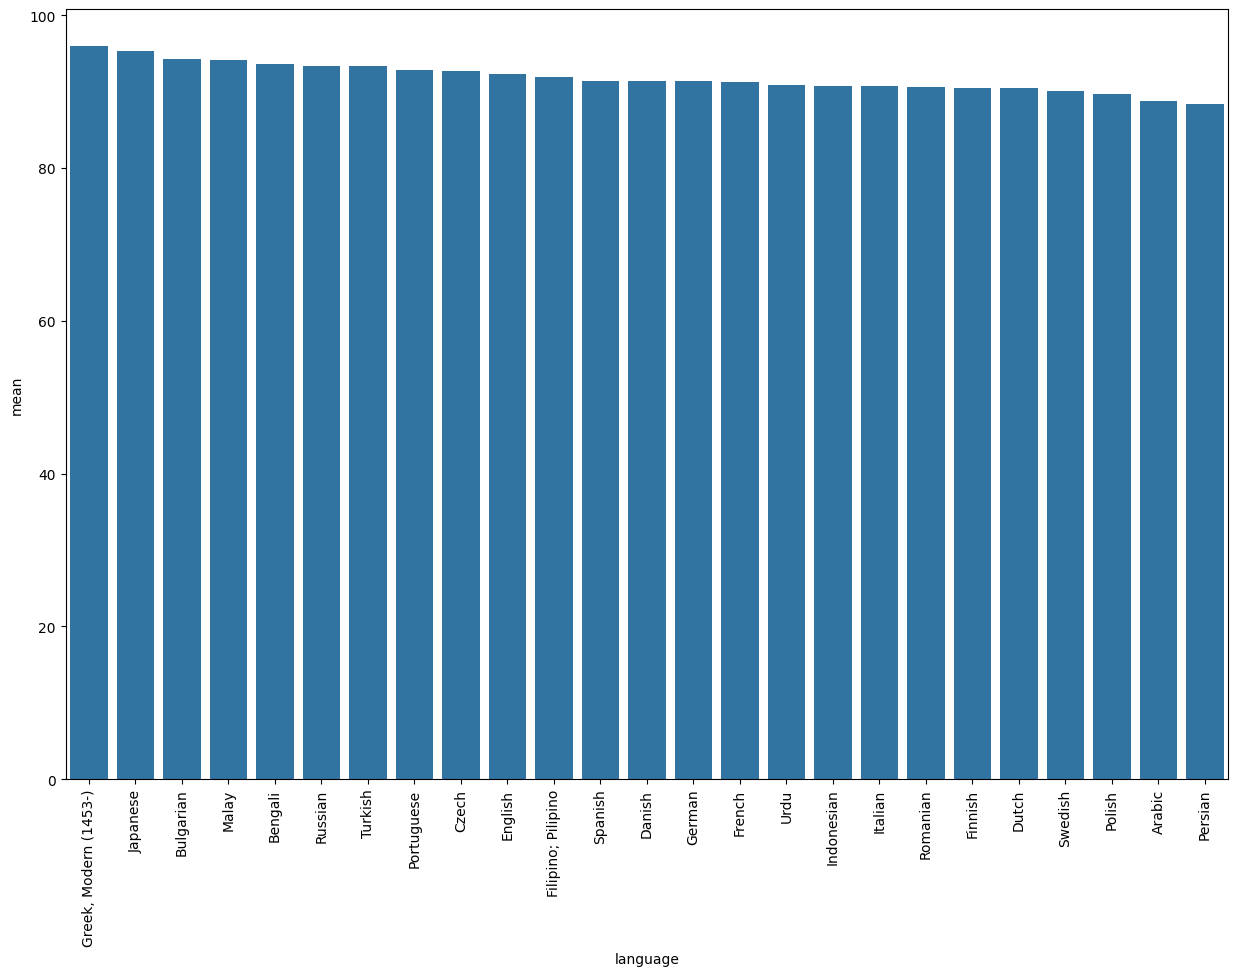

In [88]:
# plota os dados das 25 melhores linguas
plt.figure(figsize=(15, 10))
sns.barplot(data=df_language_and_liked_percent.sort_values(by="mean",ascending=False), x="language", y="mean")
plt.xticks(rotation=90)
plt.show()

## Relationship between number of pages and price

Será que o preço dos livros é influenciado pelo número de páginas?
Está seção busca responder a esta questão.

### Analise de colunas


In [101]:
# Analisa a coluna de paginas junto com a coluna de preço
print(df[["pages", "price"]].dtypes)
print(df[["pages", "price"]].isnull().sum())
print(df[["pages", "price"]].describe())

pages    object
price    object
dtype: object
pages     2347
price    14365
dtype: int64
        pages  price
count   50131  38113
unique   1365   3776
top       320   5.20
freq     1049    626


In [124]:
#É possível notar uma quantidade de dados com defeito. Eliminemos as colunas de páginas e de preço com defeito.
df_pages_and_price = df.dropna(subset=["pages", "price"])
df_pages_and_price = df_pages_and_price[["pages", "price"]]
df_pages_and_price.describe()

,pages,price
count,37432,37432
unique,1217,3721
top,320,5.20
freq,879,616


### Transformação e limpeza de dados

In [125]:
# Analisa se existe texto dentro de uma coluna em um dataframe para posterior conversão para float64
df_pages_and_price[df_pages_and_price["pages"].str.contains("[a-zA-Z]")]["pages"]
# Transforma as linhas que contém '1 page' para apenas 1
df_pages_and_price["pages"] = df_pages_and_price["pages"].str.replace("1 page", "1")
# Transforma as linhas que contém números com pontos extras (ex: '1.189.88') para números com apenas uma pontuação (ex: '1189.88')
df_pages_and_price["price"] = df_pages_and_price["price"].str.replace(".", "")
# Transforma a coluna do tipo objeto para float64
df_pages_and_price["pages"] = df_pages_and_price["pages"].astype(float)
df_pages_and_price["price"] = df_pages_and_price["price"].astype(float)
df_pages_and_price.dtypes

,0
pages,float64
price,float64


### Cálculo estatístico básico (média, moda, mediana)

In [131]:
# Cálculo a média, a moda e a mediana, agregado do desvio padrão e variáveis básicas de estatística
df_pages_and_price.agg(["mean", "median","std", "min", "max"])

,pages,price
mean,337.557999,1022.017739
median,314.000000,520.000000
std,232.957278,6049.443734
min,0.000000,9.000000
max,14777.000000,871551.000000


In [132]:
# Removendo valores que estão longe da média, utilizando os conceitos de limite superior e limite inferior, agregado
# de um limite k
k = 2
limite_superior = df_pages_and_price["price"].mean() + k * df_pages_and_price["price"].std()
limite_inferior = df_pages_and_price["price"].mean() - k * df_pages_and_price["price"].std()

# Remover valores fora do intervalo definido
df_pages_and_price_filtrado = df_pages_and_price[(df_pages_and_price["price"] <= limite_superior) & (df_pages_and_price["price"] >= limite_inferior)]
df_pages_and_price_filtrado

,pages,price
0,374.0,509.0
1,870.0,738.0
4,501.0,21.0
5,552.0,38.0
6,141.0,442.0
...,...,...
52470,416.0,555.0
52472,360.0,1918.0
52475,280.0,737.0
52476,507.0,286.0


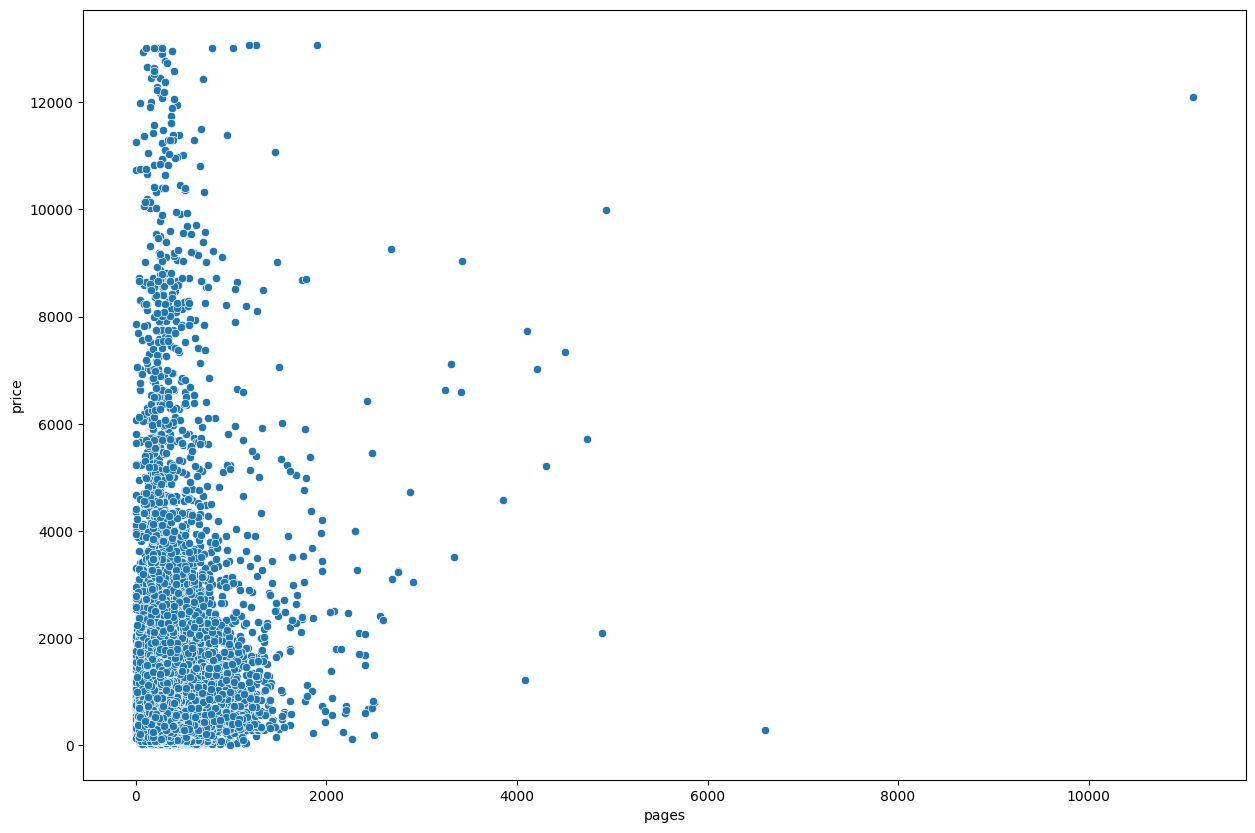

In [133]:
# Criar um gráfico que analisa a relação entre o preço e o número de páginas
plt.figure(figsize=(15, 10))
sns.scatterplot(data=df_pages_and_price_filtrado, x="pages", y="price")
plt.show()

É possível concluir, com base no gráfico anterior, que quantidade de páginas não influencia diretamente no preço final de um livro

## Relationship between author and percentage of likes

## Relationship between language and gender

* Analisar quantidade de linguas;
*

In [15]:
df["language"].value_counts()

,count
language,
English,42661
Arabic,1038
Spanish,687
French,579
German,528
...,...
Aromanian; Arumanian; Macedo-Romanian,1
Basque,1
Faroese,1


In [20]:
# A tabela gêneros trata-se de uma coluna com diversas listas sobre diversos gêneros diferentes
df["genres"].head()

,genres
0,"['Young Adult', 'Fiction', 'Dystopia', 'Fantas..."
1,"['Fantasy', 'Young Adult', 'Fiction', 'Magic',..."
2,"['Classics', 'Fiction', 'Historical Fiction', ..."
3,"['Classics', 'Fiction', 'Romance', 'Historical..."
4,"['Young Adult', 'Fantasy', 'Romance', 'Vampire..."
